In [ ]:
import pandas as pd
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk                         # Natural Language Toolkit
nltk.download('stopwords')          # Download stopwords data
from nltk.corpus import stopwords  # Stopwords corpus for text processing
from nltk.stem import SnowballStemmer  # Snowball stemming algorithm for text processing
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Clone the dataset repository from GitHub
!git clone https://github.com/chanchalIITP/AuthorIdentification.git
# Load the dataset from GitHub
files_path = r'/content/AuthorIdentification/Dataset/Dataset_with_varying_number_of_tweets/1000_tweets_per_user.csv'
# Read the dataset from a CSV file
dataset = pd.read_csv(files_path)

Cloning into 'AuthorIdentification'...
remote: Enumerating objects: 112, done.
remote: Total 112 (delta 0), reused 0 (delta 0), pack-reused 112
Receiving objects: 100% (112/112), 17.55 MiB | 5.42 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
dataset.rename(columns={'0': 'Text',
                   '1': 'Author'},
          inplace=True, errors='raise')

In [ ]:
class_counts = dataset['Author'].value_counts()
print(class_counts)

Author
61771813     1000
35662913     1000
24546595     1000
64995168     1000
24882874     1000
34873480     1000
47123216     1000
54163968     1000
35047348     1000
15300331     1000
17515820     1000
69596571     1000
24476282     1000
29541331     1000
48752834     1000
90464628     1000
76736193     1000
71472524     1000
94729807     1000
17866869     1000
47716990     1000
39947845     1000
16496165     1000
51964081     1000
110714732    1000
44711166     1000
23184632     1000
113900779    1000
21163181     1000
29256466     1000
71166537     1000
17925141     1000
65886278     1000
90078731     1000
27521888     1000
29155146     1000
15401533     1000
39563785     1000
35261530     1000
53353788     1000
23539738     1000
18123064     1000
49986051     1000
29130903     1000
74333956     1000
88845190     1000
19961531     1000
56117318     1000
22280964     1000
63611401     1000
Name: count, dtype: int64


In [ ]:
# Define the number of samples to select from each class
num_samples = 900

# Get the unique class labels in the dataframe
unique_classes = dataset['Author'].unique()

# Create an empty list to store the sampled rows
sampled_rows = []

# For each unique class, randomly sample the desired number of rows
for cls in unique_classes:
    rows = dataset.loc[dataset['Author'] == cls]
    sampled = rows.sample(n=num_samples, replace=True, random_state=123)
    sampled_rows.append(sampled)

# Combine the sampled rows into a new dataframe
df_sampled = pd.concat(sampled_rows)

# Display the sampled dataframe
dataset=df_sampled

In [ ]:
# Perform data preprocessing
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')

#def preprocess(sentence):
  #sentence=str(sentence)
 # sentence = sentence.lower()
  #sentence=sentence.replace('{html}',"")
  #cleanr = re.compile('<.*?>#@')
  #cleantext = re.sub(cleanr, '', sentence)
  #rem_url=re.sub(r'http\S+', '',cleantext)
  #rem_num = re.sub('[0-9]+', '', rem_url)
  #tokenizer = RegexpTokenizer(r'\w+')
  #tokens = tokenizer.tokenize(cleantext)
  #filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  #stem_words=[stemmer.stem(w) for w in filtered_words]
 # lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
 # return  sentence #" ".join(filtered_words)

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)
#Apply preprocessing to the dataset
dataset['Text'] = dataset['Text'].apply(preprocess_text)

# Split the dataset into features (content) and target variable (author)
features = dataset['Text']
target = dataset['Author']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a list to store the results
results = []

# Define a pipeline for each classifier with different vectorizers
classifiers = [
    ('Naive Bayes', [
    ('BoW', CountVectorizer()),
        ('TF-IDF', TfidfVectorizer()),
        ('Ngram (1,2)', CountVectorizer(ngram_range=(1, 2))),
        ('Combined (TF-IDF + N-gram (1, 4))',TfidfVectorizer(ngram_range=(1, 4))),
     ], MultinomialNB()),

    ('Linear SVM', [
        ('BoW', CountVectorizer()),
        ('TF-IDF', TfidfVectorizer()),
        ('Ngram (1,2)', CountVectorizer(ngram_range=(1, 2))),
        ('Combined (TF-IDF + N-gram (1, 4))',TfidfVectorizer(ngram_range=(1, 4))),
    ], LinearSVC()),

   ('Logistic Regression', [
   ('BoW', CountVectorizer()),
      ('TF-IDF', TfidfVectorizer()),
        ('Ngram (1,2)', CountVectorizer(ngram_range=(1, 2))),
        ('Combined (TF-IDF + N-gram (1, 4))',TfidfVectorizer(ngram_range=(1, 4))),
    ], LogisticRegression())
]


# Train and evaluate each classifier with different vectorizers
for name, vectorizers, classifier in classifiers:
    for vectorizer_name, vectorizer in vectorizers:
        # Define the pipeline for the classifier and vectorizer combination
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])


           # Train the classifier
        model = pipeline
        model.fit(X_train, y_train)

        # Predict the author for the test set
        predictions = model.predict(X_test)

        # Evaluate the accuracy of the model
        accuracy = accuracy_score(y_test, predictions)

        # Compute and print the confusion matrix
        cm = confusion_matrix(y_test, predictions)
        print(f"Confusion Matrix for {name} with {vectorizer_name}:\n{cm}")

        # Add the results to the list
        results.append({'Classifier': name, 'Feature Representation': vectorizer_name, 'Accuracy': accuracy})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the summarized results
print("\nResults Summary:")
print(results_df)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Confusion Matrix for Naive Bayes with BoW:
[[150   0   0 ...   0   0   1]
 [  0 163   0 ...   4   0   0]
 [  0   0 122 ...   0   5   0]
 ...
 [  0   0   0 ... 147   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for Naive Bayes with TF-IDF:
[[157   0   0 ...   0   0   1]
 [  0 158   0 ...   4   0   0]
 [  0   0 121 ...   0   3   0]
 ...
 [  0   0   0 ... 145   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for Naive Bayes with Ngram (1,2):
[[157   0   0 ...   0   0   1]
 [  0 163   1 ...   3   0   0]
 [  1   1 127 ...   0   2   0]
 ...
 [  0   0   0 ... 148   1   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for Naive Bayes with Combined (TF-IDF + N-gram (1, 4)):
[[160   0   0 ...   0   0   1]
 [  0 159   1 ...   4   0   0]
 [  1   0 132 ...   0   2   0]
 ...
 [  0   0   0 ... 148   1   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix fo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with BoW:
[[159   0   0 ...   0   0   0]
 [  0 174   0 ...   0   0   0]
 [  2   2 139 ...   0   0   0]
 ...
 [  0   0   0 ... 147   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with TF-IDF:
[[155   0   0 ...   0   0   0]
 [  0 174   0 ...   0   0   0]
 [  1   2 139 ...   0   0   0]
 ...
 [  0   0   0 ... 146   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with Ngram (1,2):
[[162   0   0 ...   0   0   0]
 [  0 175   0 ...   0   0   0]
 [  3   0 141 ...   0   0   0]
 ...
 [  0   0   0 ... 147   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression with Combined (TF-IDF + N-gram (1, 4)):
[[155   0   0 ...   0   0   0]
 [  0 174   0 ...   0   0   0]
 [  1   2 139 ...   0   0   0]
 ...
 [  0   0   0 ... 143   1   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]

Results Summary:
             Classifier             Feature Representation  Accuracy
0           Naive Bayes                                BoW  0.845556
1           Naive Bayes                             TF-IDF  0.867889
2           Naive Bayes                        Ngram (1,2)  0.866778
3           Naive Bayes  Combined (TF-IDF + N-gram (1, 4))  0.882889
4            Linear SVM                                BoW  0.909556
5            Linear SVM                             TF-IDF  0.923444
6            Linear SVM                        Ngram (1,2)  0.911111
7            Linear SVM  Combined (TF-IDF + N-gram (1, 4))  0.906778
8   Logistic Regression                                BoW  0.890111
9   Logistic Regres

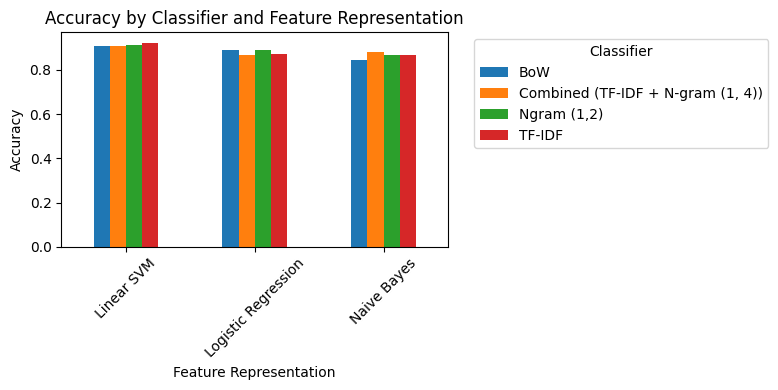

In [ ]:
import matplotlib.pyplot as plt
# Create a pivot table for plotting
pivot_table = results_df.pivot_table(columns='Feature Representation', index='Classifier', values='Accuracy')

# Plot
pivot_table.plot(kind='bar', figsize=(8, 4))
plt.title('Accuracy by Classifier and Feature Representation')
plt.xlabel('Feature Representation')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Saving and loading models
import pickle                           # For saving and loading models
from keras.models import load_model     # For loading saved Keras models
pickle.dump(classifier, open("MLmodel.pkl", "wb"))